In [3]:
from functools import partial
import numpy as np
from math import sqrt, log, pi, exp
import matplotlib.pyplot as plt
from scipy.stats import lognorm, norm

In [4]:
FACTOR_LOGNORMAL = 1.0 / ( sqrt(2.0*pi))

def lognormal(r, ksi=1.0, lambda_=1.0):
    
    par1 = FACTOR_LOGNORMAL/(ksi*r)
    par2 = -0.5*((log(r) - lambda_)/ksi)**2     
    
    return  par1 * exp(par2)

def sigma(mu, delta):
    return mu * delta

def ksi(delta):
    return sqrt(log(1.0+delta**2))

def lambda_(mu, ksi):
    return  log(mu) - 0.5 * ksi**2


def paramenters_lognormal(mu, delta):
    k = ksi(delta)    
    return sigma(mu, delta), k, lambda_(mu, k)


In [5]:
def tipoI(x, alpha, u):
    par1 = exp(-alpha * (x - u))
    return alpha*exp(-par1)*par1


def alpha(sig):
    return (pi/sqrt(6))*(1.0/sig)

def u(mu, alpha):
    return mu - 0.5772/alpha

# U1 - Temperatura interna: LogNormal

In [6]:
mu1, delta1 = 331.662, 0.1

sigma1, ksi1, lambda1 =  paramenters_lognormal(mu1, delta1)

print(f'sigma = {sigma1:.3f} ksi = {ksi1:.5f} lambda = {lambda1:.5f}')

sigma = 33.166 ksi = 0.09975 lambda = 5.79914


In [7]:
x = np.arange(0.01, mu1+10*sigma1, 0.01)
p = np.arange(0.0, 1.0, 0.001)

# 
# scale = exp μ, where μ is the mean of the log of the variate
# s = the standard deviation of the log of the variate

f1 = partial(lognorm.pdf, s=ksi1, scale=exp(lambda1))
F1 = partial(lognorm.cdf, s=ksi1, scale=exp(lambda1))
IF1 = partial(lognorm.ppf, s=ksi1, scale=exp(lambda1))

pdf = f1(x)
cdf = F1(x)
icdf = IF1(p)

In [8]:
def graph_pdf(x, pdf, mu, xlabel, ylabel):
    
    plt.figure(figsize=(8, 4))

    plt.plot(x, pdf, label='dist')
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    plt.axvline(x = mu, color = 'r', label = 'Media')

    plt.legend()

    plt.show()
    

def graph_cdf(x, cdf, mu, xlabel, ylabel):

    plt.figure(figsize=(8, 4))
    
    plt.plot(x, cdf, label='dist')
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    plt.axvline(x = mu, color = 'r', label = 'Media')

    plt.legend()

    plt.show()
    
def graph_icdf(x, icdf, mu, xlabel, ylabel):
    plt.figure(figsize=(8, 4))
    plt.plot(p, icdf, label='Função inversa Acumulada')
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    plt.axhline(y = mu, color = 'r', label = 'Media')

    plt.legend()

    plt.show()

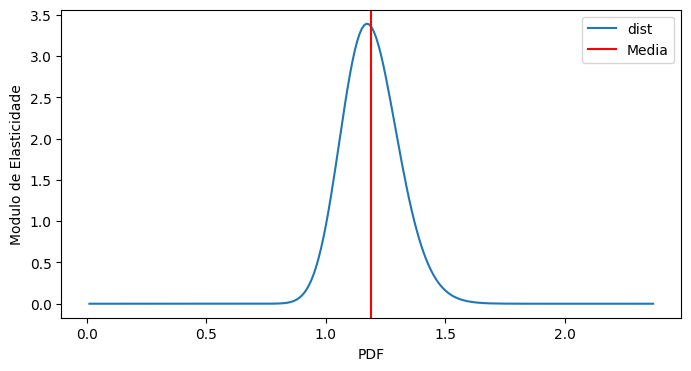

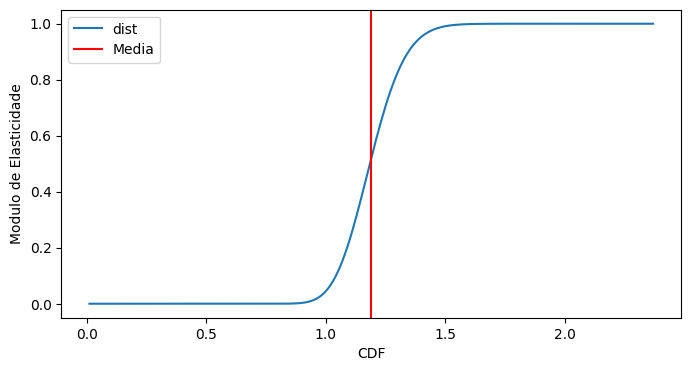

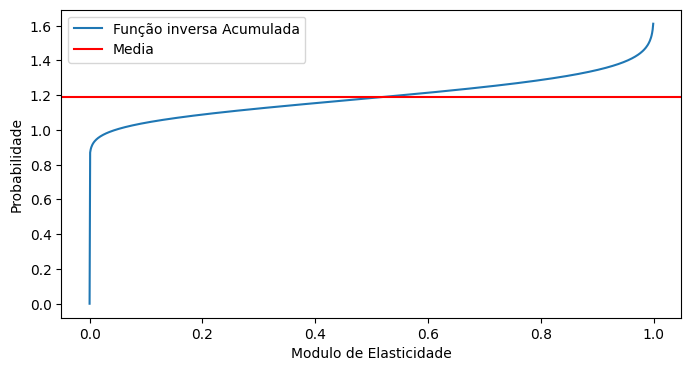

In [10]:
graph_pdf(x, pdf, mu1, 'Temperatura interna', 'PDF')
graph_cdf(x, cdf, mu1, 'Temperatura interna', 'CDF')
graph_icdf(x, icdf, mu1, 'Probabilidade', 'Temperatura interna')

# U2 - Presao interna: Normal

In [14]:
mu2, delta2 = 1.5e+07, 0.3

sigma2 = sigma(mu2, delta2)

print(f'sigma = {sigma2:.3f}')

sigma = 4500000.000


In [18]:
# 
# scale = exp μ, where μ is the mean of the log of the variate
# s = the standard deviation of the log of the variate

f2 = partial(norm.pdf, loc=mu2, scale=sigma2)
F2 = partial(norm.cdf, loc=mu2, scale=sigma2)
IF2 = partial(norm.ppf, loc=mu2, scale=sigma2)

x = np.arange(0.01, mu2+10*sigma2, 1e+05)
p = np.arange(0.0, 1.0, 0.001)

pdf = f2(x)
cdf = F2(x)
icdf = IF2(p)

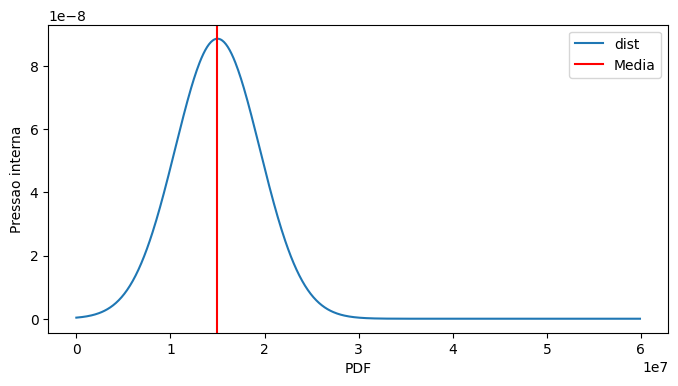

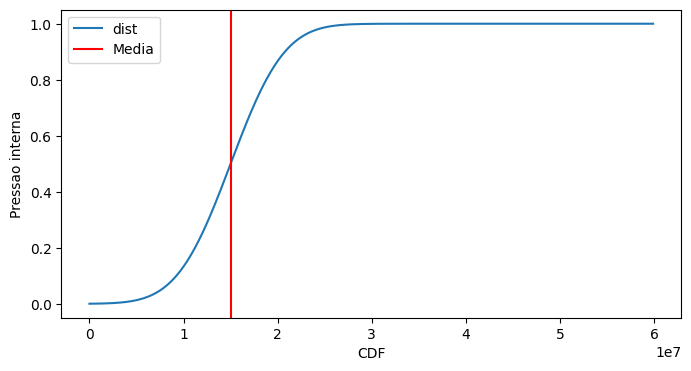

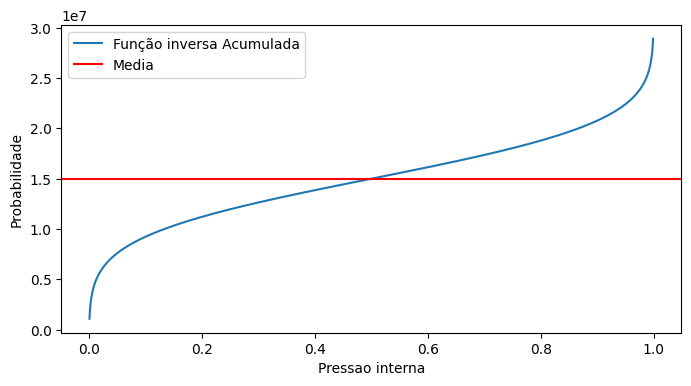

In [19]:
graph_pdf(x, pdf, mu2, 'Pressao interna', 'PDF')
graph_cdf(x, cdf, mu2, 'Pressao interna', 'CDF')
graph_icdf(x, icdf, mu2, 'Probabilidade', 'Pressao interna')

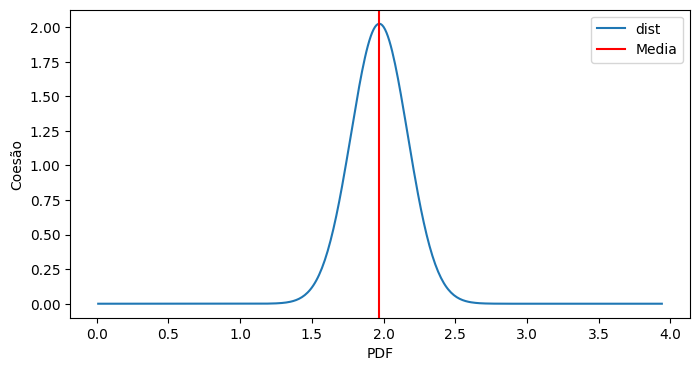

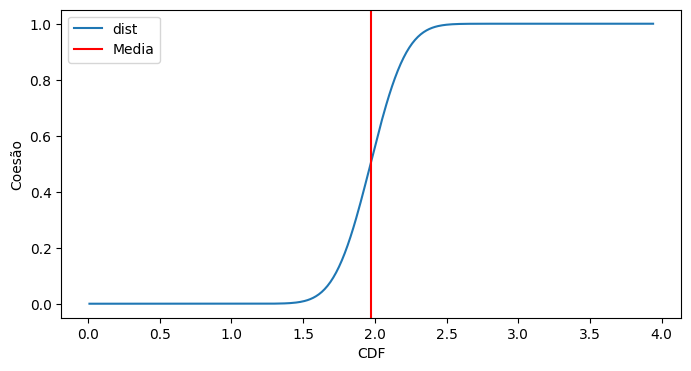

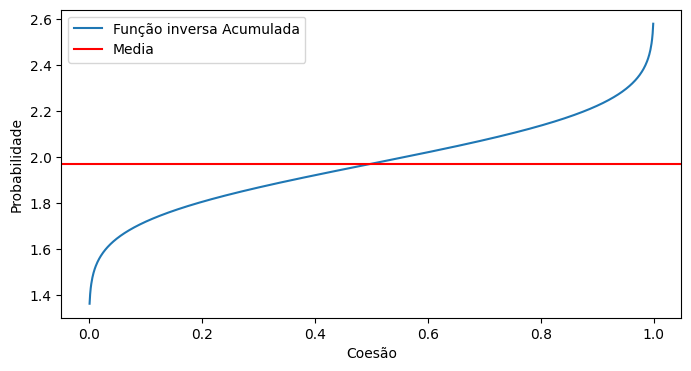

In [16]:
graph_pdf(x, pdf, mu3, 'Coesão', 'PDF')
graph_cdf(x, cdf, mu3, 'Coesão', 'CDF')
graph_icdf(x, icdf, mu3, 'Probabilidade', 'Coesão')

# FORMS LOOP

In [23]:
def print_array(name, array):
    print(name, end=' ')
    for a in array:
        print(f'{a:.3e}', end=' ')
    print()
        
def array_V(Ua, list_of_F):
    cholesky = np.ones_like(Ua) 
    
    vector = np.zeros_like(Ua)
    for i, (u, F) in enumerate(zip(Ua, list_of_F)):
        vector[i] = norm.ppf(F(u))    
        
    return cholesky * vector


def array_Y(Va):
    
    cholesky = np.ones_like(Va)      
        
    return cholesky * Va


def array_U(Vn, IFs):
    
    Y =  array_Y(Vn)
    
    vector = np.zeros_like(Y)
    
    for i, (y, IF) in enumerate(zip(Y, IFs)):
        vector[i] = IF(norm.cdf(y))

    return vector

def matrix_A(Ua, fs, Fs):
    
    A = np.zeros_like(Ua)
    
    for i, (U, f, F) in enumerate(zip(Ua, fs, Fs)):
        A[i]= f(U) / norm.pdf(norm.ppf(F(U)))  
    
    return A
    
    
def i_matrix_A(A):
    return 1.0/A

In [24]:
fs = (f1, f2)
Fs = (F1, F2)
IFs = (IF1, IF2)

## Iteração: 01

In [48]:
Ua = np.array([331.622, 1.5e+07])
beta = 20
delta = 0.01
gamma = 0.3

# RCs
RC = .3675
novos_rcs =  np.array([.3782, .3688])

Uaux = Ua*(1+delta)

Gi = RC - gamma
Gaux = novos_rcs - gamma

print('Gi', Gi)
print_array('Uaux', Uaux)
print_array('Gaux', Gaux)

Gi 0.0675
Uaux 3.349e+02 1.515e+07 
Gaux 7.820e-02 6.880e-02 


In [49]:
GradU = (Gaux - Gi)/(Ua*delta)

Vi = array_V(Ua, Fs)

A = matrix_A(Ua, fs, Fs)
iA = i_matrix_A(A)
Grad_gi = iA * GradU

Modg = np.linalg.norm(Grad_gi, ord=2)

Modg_square = Modg**2
Vn = ((np.dot(Grad_gi, Vi) - Gi) * Grad_gi) / Modg_square
betai = np.linalg.norm(Vn)

tol = abs(betai - beta) / betai

Un = array_U(Vn, IFs)

print_array('GradU', GradU)
print_array('Vi', Vi)
print_array('A', A)
print_array('iA', iA)
print_array('Grad_gi', Grad_gi)
print(f'Modg = |Grad_gi| = {Modg}')
print_array('Vn', Vn)
print(f'betai = |Vn| = {betai:.3e}')
print(f'tol = {tol:.3e}')  
print_array('Un', Un) 

GradU 3.227e-03 8.667e-09 
Vi 4.867e-02 0.000e+00 
A 3.023e-02 2.222e-07 
iA 3.308e+01 4.500e+06 
Grad_gi 1.067e-01 3.900e-02 
Modg = |Grad_gi| = 0.11363597051018733
Vn -5.150e-01 -1.882e-01 
betai = |Vn| = 5.483e-01
tol = 3.548e+01
Un 3.135e+02 1.415e+07 


# Iteração 02:

In [50]:
Ua = np.array(Un)
beta = betai

# RCs
rc = .299
novos_rcs =  np.array([.31, .3002])

Uaux = Ua*(1+delta)

Gi = rc - gamma
Gaux = novos_rcs - gamma

print_array('Ua', Ua)
print_array('Uaux', Uaux)
print_array('Gaux', Gaux)

Ua 3.135e+02 1.415e+07 
Uaux 3.166e+02 1.429e+07 
Gaux 1.000e-02 2.000e-04 


In [51]:
GradU = (Gaux - Gi)/(Ua*delta)

Vi = array_V(Ua, Fs)

A = matrix_A(Ua, fs, Fs)
iA = i_matrix_A(A)
Grad_gi = iA * GradU

Modg = np.linalg.norm(Grad_gi, ord=2)

Modg_square = Modg**2
Vn = ((np.dot(Grad_gi, Vi) - Gi) * Grad_gi) / Modg_square
betai = np.linalg.norm(Vn)

tol = abs(betai - beta) / betai

Un = array_U(Vn, IFs)

print_array('GradU', GradU)
print_array('Vi', Vi)
print_array('A', A)
print_array('iA', A)
print_array('Grad_gi', Grad_gi)
print(f'Modg = |Grad_gi| = {Modg}')
print_array('Vn', Vn)
print(f'betai = |Vn| = {betai:.3e}')
print(f'tol = {tol:.3e}')  
print_array('Un', Un) 

GradU 3.509e-03 8.479e-09 
Vi -5.150e-01 -1.882e-01 
A 3.198e-02 2.222e-07 
iA 3.198e-02 2.222e-07 
Grad_gi 1.097e-01 3.815e-02 
Modg = |Grad_gi| = 0.11617064331095411
Vn -5.097e-01 -1.772e-01 
betai = |Vn| = 5.396e-01
tol = 1.608e-02
Un 3.137e+02 1.420e+07 


# Iteração 03:

In [52]:
Ua = np.array(Un)
beta = betai

# RCs
rc = .3
novos_rcs =  np.array([.311, .3013])

Uaux = Ua*(1+delta)

Gi = rc - gamma
Gaux = novos_rcs - gamma

print_array('Ua', Ua)
print_array('Uaux', Uaux)
print_array('Gaux', Gaux)

Ua 3.137e+02 1.420e+07 
Uaux 3.168e+02 1.434e+07 
Gaux 1.100e-02 1.300e-03 


In [53]:
GradU = (Gaux - Gi)/(Ua*delta)

Vi = array_V(Ua, Fs)

A = matrix_A(Ua, fs, Fs)
iA = i_matrix_A(A)
Grad_gi = iA * GradU

Modg = np.linalg.norm(Grad_gi, ord=2)

Modg_square = Modg**2
Vn = ((np.dot(Grad_gi, Vi) - Gi) * Grad_gi) / Modg_square
betai = np.linalg.norm(Vn)

tol = abs(betai - beta) / betai

Un = array_U(Vn, IFs)

print_array('GradU', GradU)
print_array('Vi', Vi)
print_array('A', A)
print_array('iA', A)
print_array('Grad_gi', Grad_gi)
print(f'Modg = |Grad_gi| = {Modg}')
print_array('Vn', Vn)
print(f'betai = |Vn| = {betai:.3e}')
print(f'tol = {tol:.3e}') 
print_array('Un', Un) 

GradU 3.507e-03 9.153e-09 
Vi -5.097e-01 -1.772e-01 
A 3.196e-02 2.222e-07 
iA 3.196e-02 2.222e-07 
Grad_gi 1.097e-01 4.119e-02 
Modg = |Grad_gi| = 0.11720287821506371
Vn -5.050e-01 -1.896e-01 
betai = |Vn| = 5.395e-01
tol = 2.995e-04
Un 3.138e+02 1.415e+07 


# Resultado Final

In [54]:
beta_FORM = betai
Pf_FORM = norm.cdf(-betai)
alpha_FORM = Grad_gi / Modg


beta_FORM, Pf_FORM, alpha_FORM 

print(f'betaFORM = {beta_FORM:.4f} PfFORM = {Pf_FORM:.4e}')

betaFORM = 0.5395 PfFORM = 2.9479e-01


In [55]:
alpha_FORM

array([0.93620977, 0.3514417 ])

## Fatores de importância

In [56]:
print('Fatores de importancias:')
for i, alf in enumerate(alpha_FORM):
    print(f'u_{i} = {100.0*alf**2:.4f} %')

Fatores de importancias:
u_0 = 87.6489 %
u_1 = 12.3511 %


## Fatores de Omissão

In [57]:
print('Fatores de omisao:')
for i, alf in enumerate(alpha_FORM):
    gamma = 1.0 / sqrt(1 - alf**2)
    print(f'u_{i} = {gamma:.4f}')

Fatores de omisao:
u_0 = 2.8454
u_1 = 1.0681
